In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Loading the data

In [2]:
train=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competitions/Titanic Kaggle/train.csv')
test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Competitions/Titanic Kaggle/test.csv')

# Null values

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### We will drop id column as it is completly irrelevat here
### however if we were provided with some celebrities names or cast of people we could have feature engg to create a new column called "imp persons". We can still feature engg name column by extracting title from names like Mr,Miss ..etc

### Ticket column can be handled in various ways by feature engg it with other column like cabin , but we will focus on data analysis first

In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

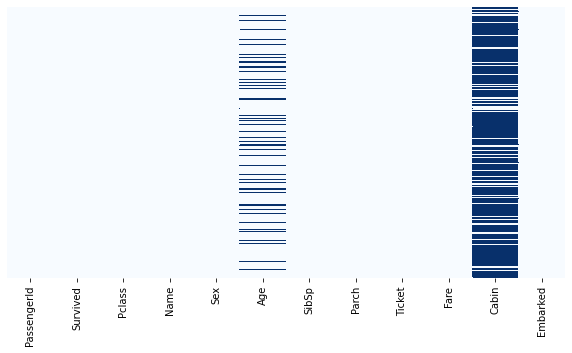

In [5]:
#Visualizating the null values
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull(),yticklabels=False,xticklabels=True,cbar=False,cmap='Blues')

In [6]:
print("% of data null for cabin column:",sum(train.isnull()['Cabin'])/len(train)*100)
print("% of data null for age column:",sum(train.isnull()['Age'])/len(train)*100)

% of data null for cabin column: 77.10437710437711
% of data null for age column: 19.865319865319865


## Before going on to fill null values lets visualize the data first

# Visualzing data per column

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Pclass

### Categorical feature 

*   1 - Rich class
*   2 - Middle class
*   3 - Poor class





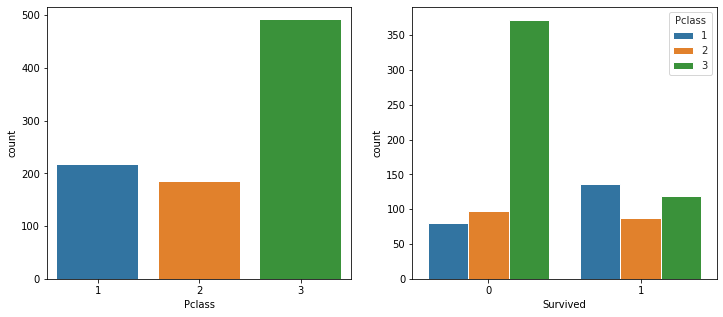

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Pclass',data=train)

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train)

### We can see a lot of poor people(Pclass=3) died in titanic accident
### This feature is important factor for our model  

## Gender

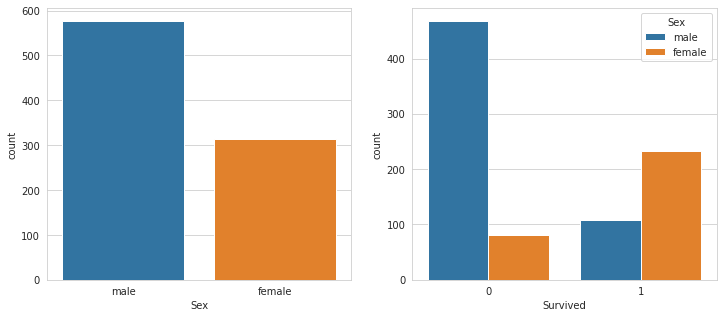

In [9]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Sex',data=train)

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train)

### Majority of male did not survived in accident , the female and children were given priority 

## Age

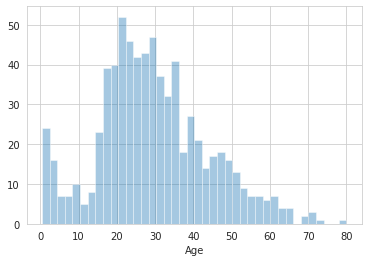

In [10]:
sns.distplot(train['Age'],kde=False,bins=40)

### Not a clean column , have many outliers

## Sibsb

### Column tells no.of siblings or relatives.. person was travelling with

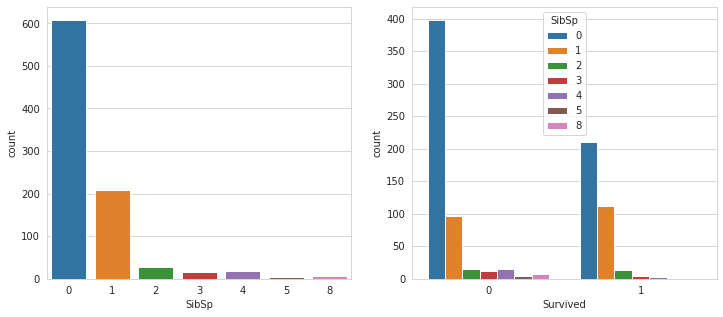

In [11]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='SibSp',data=train)

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='SibSp',data=train)

### There is no trend as such in this column ...

## Parch

### This column represents no.of parents/children

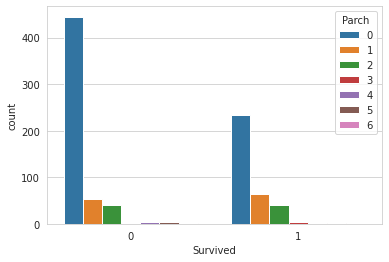

In [12]:
sns.countplot(x='Survived',hue='Parch',data=train)

### This column again represents same details  but it does not have any general trend with respect to survival  

## Fare

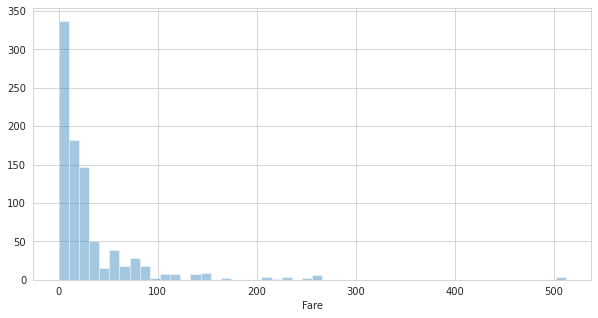

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(train['Fare'],kde=False)

### There are some outliers clearly visible in fare column
### These need to handled if we decide to use models like logistic regression otherwise can be ignored in case of trees classifiers

## Embarked

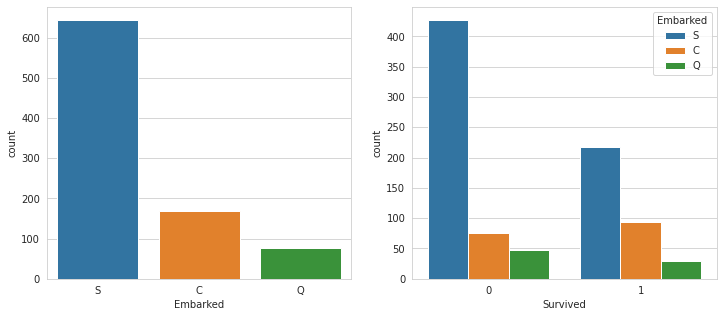

In [14]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Embarked',data=train)

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Embarked',data=train)

Not a great factor for model as of now , no such trend 
Gives us a information though ..lot of people boarded ship from port S , makes sense since S(Southampton) was the place were titanic started

# Feature relation

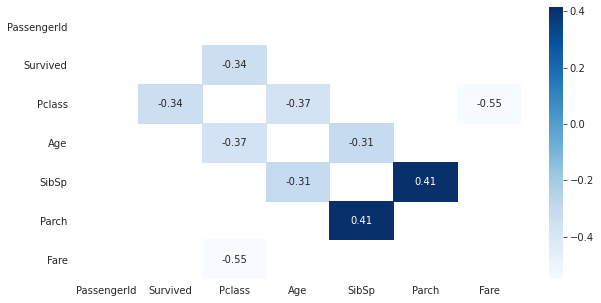

In [15]:
plt.figure(figsize=(10,5))
corr=train.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)],cmap='Blues',annot=True,fmt='.2f')

1.  We can see parch and SibSp seem to co-relate with each other 
2.  Fare vs Pclass
3.  Age vs Pclass
4.  Age vs SibSp

In [16]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

## Age vs Pclass

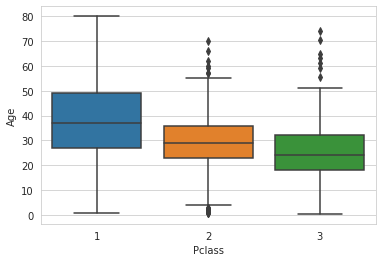

In [17]:
sns.boxplot(x='Pclass',y='Age',data=train)
# Lot of younger people are from class3 and old people belong to class1 , linear relation between Pclass and age

## Fare vs Pclass

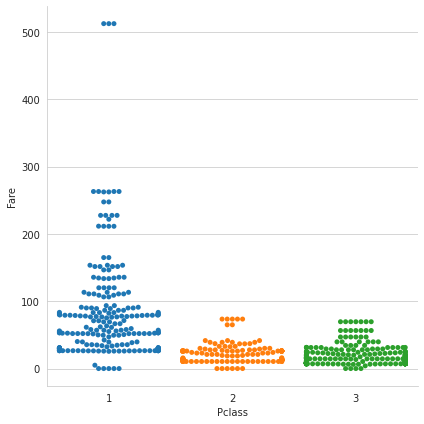

In [18]:
sns.catplot(x="Pclass", y="Fare", kind="swarm", data=train, height = 6)
# Rich Pclass people have bought higher priced ticket and class 2 & 3 have bought similar rate tickets

## Age vs SibSp

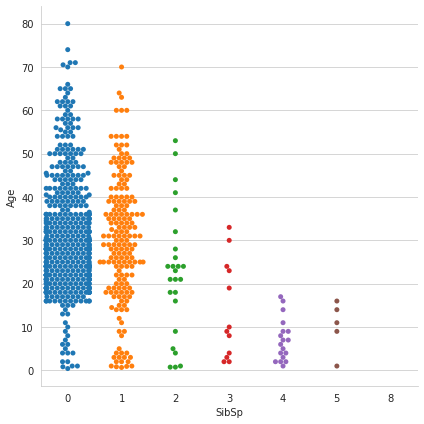

In [19]:
sns.catplot(x="SibSp", y="Age", kind="swarm", data=train, height = 6)

Passanger with SibSp of 4-5 are kids of age below 20. 
Lot of older people that are travelling alone or with a spouse

# Fill Null Values

In [20]:
train.groupby('Pclass')['Age'].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

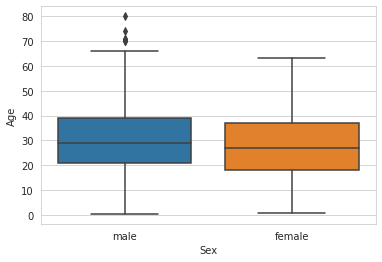

In [21]:
sns.boxplot(x='Sex',y='Age',data=train)

In [22]:
train.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [23]:
train.groupby(['Pclass','Sex'])['Age'].mean()

Pclass  Sex   
1       female    34.611765
        male      41.281386
2       female    28.722973
        male      30.740707
3       female    21.750000
        male      26.507589
Name: Age, dtype: float64

We have used Pclass , Sex as other factors to fill null values in Age

In [24]:
def fill_age(cols):
  age=cols[0]
  pclass=cols[1]
  gender=cols[2]
  if pd.isnull(age):
    if pclass==1 and gender=='male':
      return 41
    if pclass==1 and gender=='female':
      return 37
    if pclass==2 and gender=='male':
      return 31
    if pclass==2 and gender=='female':
      return 27
    if pclass==3 and gender=='male':
      return 26
    if pclass==3 and gender=='female':
      return 22
  else:
    return age

In [25]:
train['Age']=train[['Age','Pclass','Sex']].apply(fill_age,axis=1)
test['Age']=test[['Age','Pclass','Sex']].apply(fill_age,axis=1)

Filling embarked missing values with mode

In [26]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].value_counts().index[0])
test['Embarked']=test['Embarked'].fillna(test['Embarked'].value_counts().index[0])

Filling the fare null values in test data by its mean , we can also use Pclass factor to fill null values of fare as we did it in age columns. But for now we will fill it by mean value becuase only 1 value of fare is null

In [27]:
test['Fare']=test['Fare'].fillna(np.mean(test['Fare']))

We will fill null values of cabin by U meaning unknown rather than dropping it because it may be helpful in feature engg ahead

In [28]:
train['Cabin']=train['Cabin'].fillna(value='U')
test['Cabin']=test['Cabin'].fillna(value='U')

In [29]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [30]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Feature Engg

In [31]:
# Lets extract some more relevant features from given data 

### Name

In [32]:
#let's extract Titles of Passengers
train['Title']=train['Name'].str.extract('([A-Za-z]+)\.',)
test['Title']=test['Name'].str.extract('([A-Za-z]+)\.',)

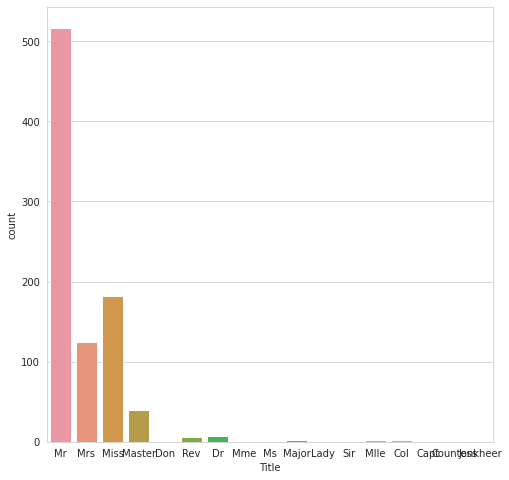

In [33]:
plt.figure(figsize=(8,8))
sns.countplot(train['Title'])

In [34]:
# There are lot of titles but only 4 are frequently occuring 
train['Title'] = train['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')
test['Title'] = test['Title'].replace(['Rev', 'Dr', 'Col', 'Ms', 'Mlle', 'Major', 'Countess', 
                                       'Capt', 'Dona', 'Jonkheer', 'Lady', 'Sir', 'Mme', 'Don'], 'Other')

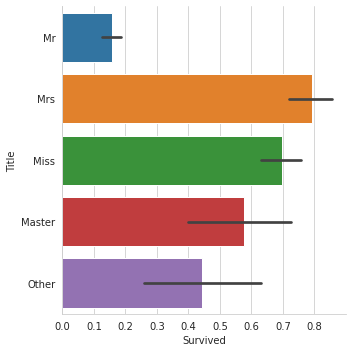

In [35]:
sns.catplot(y='Title',x='Survived',data=train,kind='bar')

### Sibsp + Parch 

In [36]:
#sibsp - Number of Siblings/Spouses Aboard. parch - Number of Parents/Children --> We need to feature engg these column as parch and sibsb are highly correlated   
train['Family_Size']=train['Parch']+train['SibSp']+1
test['Family_Size']=test['Parch']+test['SibSp']+1

### Cabin

In [37]:
import re

In [38]:
train['Cabin'] = train['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())
test['Cabin'] = test['Cabin'].map(lambda x:re.compile("([a-zA-Z])").search(x).group())

In [39]:
train['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

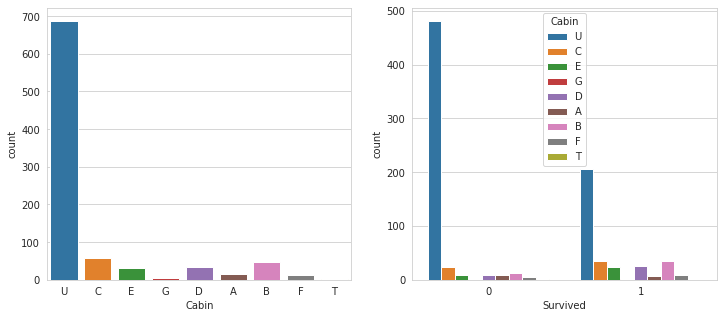

In [40]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.countplot(x='Cabin',data=train)

plt.subplot(1,2,2)
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Cabin',data=train)

Lot of people did not survive who had no cabin alloted. May be they belonged to Pclass 3 and paid less fare. Lets check.

In [41]:
unknown_cabin=train[train['Cabin']=='U']

In [42]:
unknown_cabin['Pclass'].value_counts()

3    479
2    168
1     40
Name: Pclass, dtype: int64

In [43]:
unknown_cabin.groupby('Pclass')['Fare'].mean()

Pclass
1    76.848643
2    20.909673
3    13.725077
Name: Fare, dtype: float64

## Tickets 

In [44]:
ticket_fare_cabin=pd.DataFrame(train.groupby(['Cabin','Pclass'])['Ticket'].unique())

In [45]:
ticket_fare_cabin.to_dict()

{'Ticket': {('A',
   1): array(['113788', 'PC 17754', '17764', '113767', '112277', '113056',
         '33638', '110465', '11755', '13049', 'PC 17485', '27042', '13213',
         '112050', 'PC 17590'], dtype=object),
  ('B',
   1): array(['PC 17569', '113509', '113572', 'PC 17558', 'PC 17593', '111240',
         'PC 17610', '110152', '112059', '11967', 'PC 17608', '111361',
         'PC 17477', '113760', '11771', '12749', '113050', '13568',
         'WE/P 5735', '13567', '13214', 'F.C. 12750', 'PC 17755', '24160',
         '17474', '112058', '695', '112053'], dtype=object),
  ('C', 1): array(['PC 17599', '113803', '113783', '19950', '19947', '36973',
         '110465', '113776', 'PC 17595', '19943', '19928', '113514',
         'PC 17582', 'PC 17760', 'PC 17596', '113781', '19988', 'PC 17758',
         '11767', '36928', '113043', '113510', '113503', '110564', '113786',
         '113051', '17453', '113787', 'PC 17483', 'PC 17761', '17421',
         '11769', '19996', 'PC 17757', 'PC 17482'

Lets Observe some points in ticket column:-


*   T Cabin was alloted only to one person of Pclass 1 with ticket no:-113784
*   Cabin A,B,C,D was never alloted to person of Pclass 3, infact Cabin A,B,C were only given to Pclass 1
*   Cabin E,F,G were given to Pclass 2 and 3
*   Majority of Pclass 3 were given unkown cabins 





In [46]:
#We can make new columns from cabin+pclass as Superior_Cabins and Non-Superior_Cabins
def superior_cabins(df):
  if df['Cabin']=='A' or df['Cabin']=='B' or df['Cabin']=='C' or df['Cabin']=='D' or df['Cabin']=='T':
    return 1
  if df['Cabin']=='E' or df['Cabin']=='F' or df['Cabin']=='G':
    return 0
  if df['Cabin']=='U' and df['Pclass']==1:
    return 1
  if df['Cabin']=='U' and df['Pclass']==2:
    return 0
  if df['Cabin']=='U' and df['Pclass']==3:
    return 0

In [47]:
train['Superior_Cabins']=train.apply(lambda x:superior_cabins(x),axis=1)

In [48]:
test['Superior_Cabins']=test.apply(lambda x:superior_cabins(x),axis=1)

In [49]:
train.groupby(['Cabin','Embarked'])['Ticket'].unique().to_dict()

{('A',
  'C'): array(['PC 17754', '17764', '112277', '11755', '13049', 'PC 17485',
        '13213'], dtype=object),
 ('A',
  'S'): array(['113788', '113767', '113056', '33638', '110465', '27042', '112050',
        'PC 17590'], dtype=object),
 ('B',
  'C'): array(['PC 17569', '113509', 'PC 17558', 'PC 17593', 'PC 17610', '11967',
        'PC 17608', '111361', 'PC 17477', '11771', '13568', '13567',
        '13214', 'PC 17755'], dtype=object),
 ('B', 'S'): array(['113572', '111240', '110152', '112059', '113760', '12749',
        '113050', 'WE/P 5735', 'F.C. 12750', '24160', '17474', '112058',
        '695', '112053'], dtype=object),
 ('C', 'C'): array(['PC 17599', 'PC 17595', 'PC 17596', 'PC 17758', '11767',
        'PC 17760', '113503', '113051', '17453', 'PC 17761', '17421',
        'PC 17757', 'PC 17482', '11774', '111369'], dtype=object),
 ('C', 'Q'): array(['19928'], dtype=object),
 ('C',
  'S'): array(['113803', '113783', '19950', '19947', '36973', '110465', '113776',
        '19943

Titanic journey started from Southampton(S) to Cherbourg(C) and then Queenstown(Q)
1. C represented in tickets may represent that journey started from Cherbourg
2. Less tickets sold of Queenstown ( we can also see fare comparison of tickets as per embarked,we will explore this next)
3. We can probably map the entire tickets with design of ship using cabin and embarked columns but that will require a lot of knwoledge about titanic ship





## Fare

In [50]:
train[train['Fare']==0]['Survived'].value_counts()
# Some people got tickets for free...wohooo! But majority of them could not survive

0    14
1     1
Name: Survived, dtype: int64

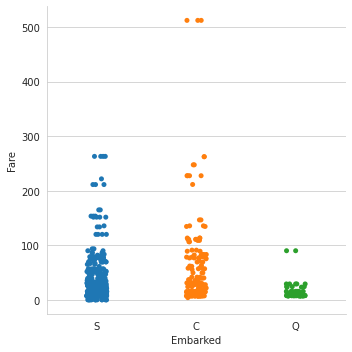

In [51]:
sns.catplot(x='Embarked',y='Fare',data=train)

Fairly similar prices of tickets of S and C and very less fare from Q(last stop of ship). Cherbourg(Paris) seems to be the place where rich people boarded the ship!

In [52]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Superior_Cabins
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr,1,0


# Handling categorical features

1.   Pclass
2.   Sex
3.   Embarked
4.   Title 
5.   Cabin



In [53]:
def convert_categorical(data,cols): # cols=['Sex','Pclass','Embarked','Title','Cabin']
  cat1=pd.get_dummies(data[cols[0]],drop_first=True)
  cat2=pd.get_dummies(data[cols[1]],drop_first=True)
  cat3=pd.get_dummies(data[cols[2]],drop_first=True)
  cat4=pd.get_dummies(data[cols[3]],drop_first=True)
  cat5=pd.get_dummies(data[cols[4]],drop_first=True)
  data=pd.concat([data,cat1,cat2,cat3,cat4,cat5],axis=1)
  data.drop(cols,axis=1,inplace=True)

  return data

In [54]:
train=convert_categorical(cols=['Sex','Pclass','Embarked','Title','Cabin'],data=train)

In [55]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Family_Size,Superior_Cabins,male,2,3,Q,S,Miss,Mr,Mrs,Other,B,C,D,E,F,G,T,U
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1


In [56]:
test=convert_categorical(cols=['Sex','Pclass','Embarked','Title','Cabin'],data=test)

In [57]:
train.columns

Index([    'PassengerId',        'Survived',            'Name',
                   'Age',           'SibSp',           'Parch',
                'Ticket',            'Fare',     'Family_Size',
       'Superior_Cabins',            'male',                 2,
                       3,               'Q',               'S',
                  'Miss',              'Mr',             'Mrs',
                 'Other',               'B',               'C',
                     'D',               'E',               'F',
                     'G',               'T',               'U'],
      dtype='object')

In [58]:
test.columns

Index([    'PassengerId',            'Name',             'Age',
                 'SibSp',           'Parch',          'Ticket',
                  'Fare',     'Family_Size', 'Superior_Cabins',
                  'male',                 2,                 3,
                     'Q',               'S',            'Miss',
                    'Mr',             'Mrs',           'Other',
                     'B',               'C',               'D',
                     'E',               'F',               'G',
                     'U'],
      dtype='object')

In [59]:
# Lets add t binary columns missing in test dataset
test['t']=0

# Feature selection

In [60]:
X = train.drop(['Name','Ticket','Survived','PassengerId'],axis=1)
y = train['Survived']

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

## Univariate Selection

In [62]:
from sklearn.feature_selection import SelectKBest,chi2
feature_imp=SelectKBest(score_func=chi2, k=10)

In [63]:
imp=feature_imp.fit(X,train['Survived'])

In [64]:
f_imp=pd.DataFrame(imp.scores_,columns=['Score'])
f_imp['Columns']=train.drop(['Name','Ticket','Survived','PassengerId'],axis=1).columns

In [65]:
f_imp.sort_values('Score',ascending=False)

,Score,Columns
12,112.805785,Mr
6,92.702447,male
13,88.050392,Mrs
11,75.855581,Miss
5,46.184290,Superior_Cabins
8,41.553071,3
15,25.875581,B
22,20.488314,U
17,19.489646,D
18,18.140638,E


## Extra-Tress Classifier Selection

[0.19633939 0.03400935 0.02096265 0.19444342 0.03858101 0.01578684
 0.11692475 0.01418661 0.05094705 0.01086131 0.02262691 0.04071963
 0.12975255 0.03331742 0.01060601 0.00732551 0.00511794 0.00551646
 0.00993253 0.00236384 0.00176505 0.00046591 0.03744787]


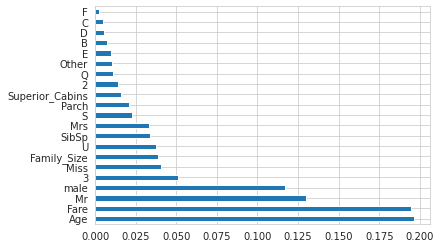

In [66]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 

feat_importances = pd.Series(model.feature_importances_, index=train.drop(['Name','Ticket','Survived','PassengerId'],axis=1).columns)
feat_importances.nlargest(21).plot(kind='barh')
plt.show()

## Correlation Matrix Method

In [67]:
pd.DataFrame(train.corr()['Survived']).sort_values('Survived',ascending=False)

,Survived
Survived,1.000000
Mrs,0.339040
Miss,0.327093
Superior_Cabins,0.257598
Fare,0.257307
B,0.175095
D,0.150716
E,0.145321
C,0.114652
2,0.093349


Best Columns:-
1. Fare
2. Age 
3. Mr,Miss,Mrs
4. Age 
5. Pclass
6. Superior Cabins 




In [68]:
train.to_csv('train_clean.csv',index=False)
test.to_csv('test_clean.csv',index=False)